## Space/Time model order reduction

In [16]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ezyrb import SpaceTimePOD, SpaceTimeDatabase, POD

## Dataset

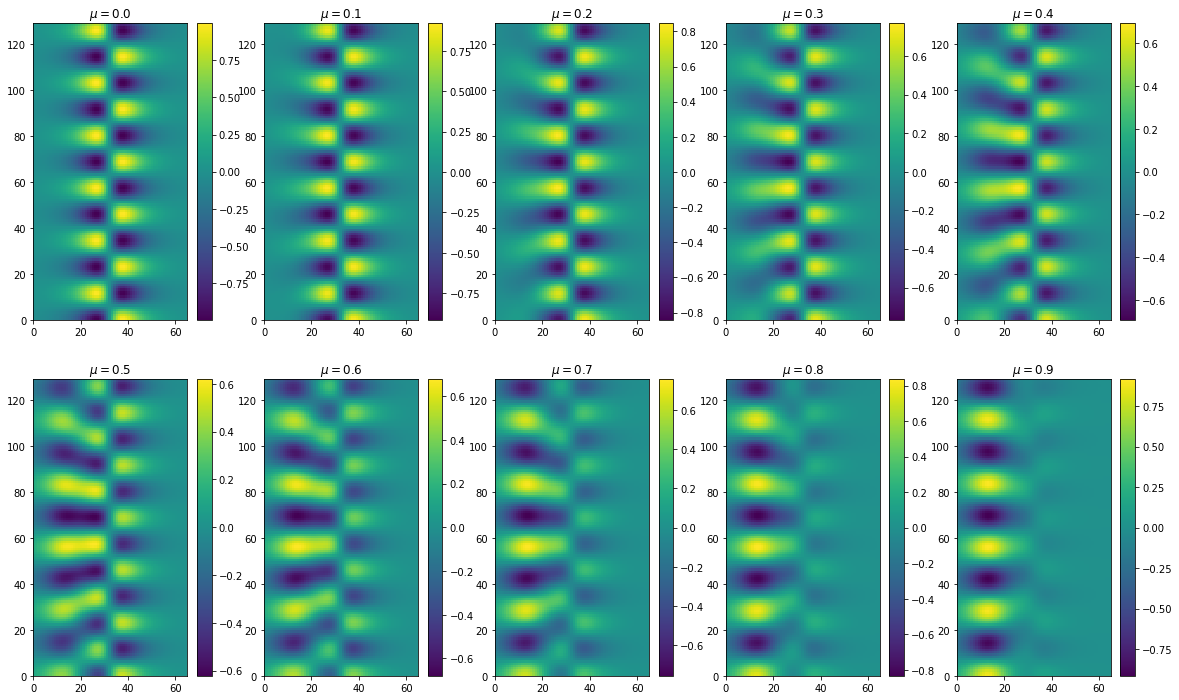

In [17]:
def f1(x,t): 
    return 1./np.cosh(x+3)*np.exp(2.3j*t)

def f2(x,t):
    return 2./np.cosh(x)*np.tanh(x)*np.exp(2.8j*t)

x = np.linspace(-5, 5, 65)
t = np.linspace(0, 4*np.pi, 129)

xgrid, tgrid = np.meshgrid(x, t)

Y1 = f1(xgrid, tgrid)
Y2 = f2(xgrid, tgrid)

mus = [round(mu,1) for mu in np.linspace(0,0.9,10)]

Y = np.array([
    mu * Y1 + (1-mu) * Y2 for mu in mus
])

Y = np.swapaxes(Y,1,2)
Y.shape

plt.figure(figsize=(20,12))
for i in range(Y.shape[0]):
    plt.subplot(2, 5, i+1)
    plt.pcolor(Y[i].T.real)
    plt.colorbar()
    plt.title('$\mu = {}$'.format(mus[i]))
plt.show()

## Double POD

In [18]:
# to be consistent with dimensions used in Database and ReducedOrderModel
X = Y.T
    
stPOD = SpaceTimePOD(tailored=True,spatial_pod_args={'rank':0.99999}, temporal_pod_args={'rank':0.99999})
coeffs = stPOD.reduce(X)

## Modes and coefficients

(8385, 4)


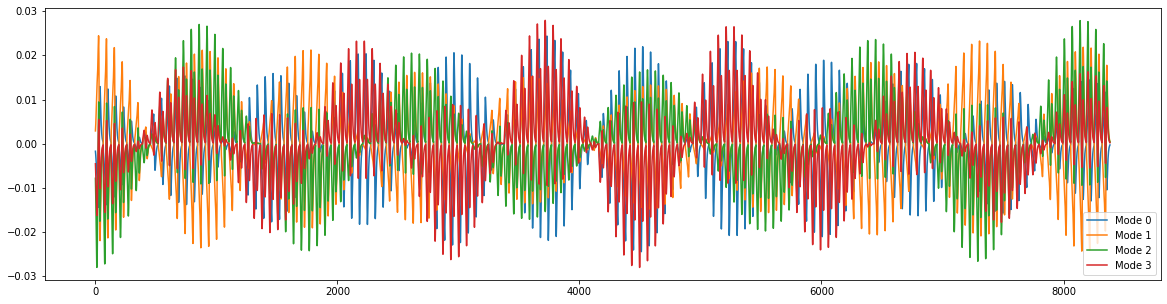

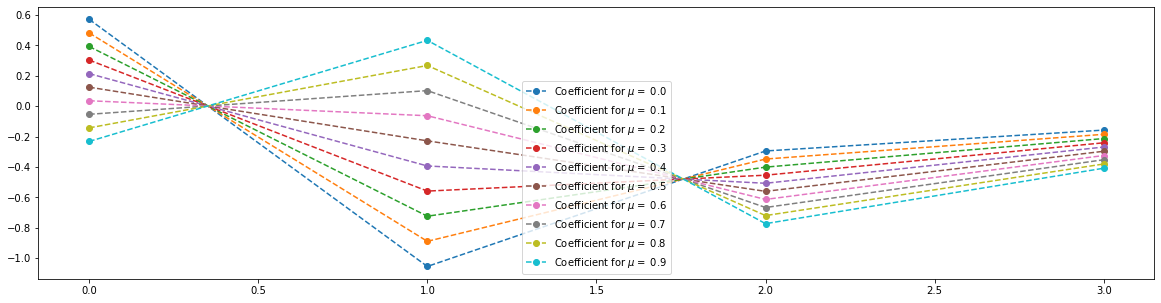

In [19]:
print(stPOD.modes.shape)

plt.figure(figsize=(20,5))
for idx,mode in enumerate(stPOD.modes.T):
    plt.plot(mode, label='Mode {}'.format(idx))
plt.legend()
plt.show()

plt.figure(figsize=(20,5))
for idx,cof in enumerate(coeffs.T):
    plt.plot(cof, '.', linestyle='--', marker='o', label='Coefficient for $\mu=$ {}'.format(mus[idx]))
plt.legend()
plt.show()

## Reconstructed data

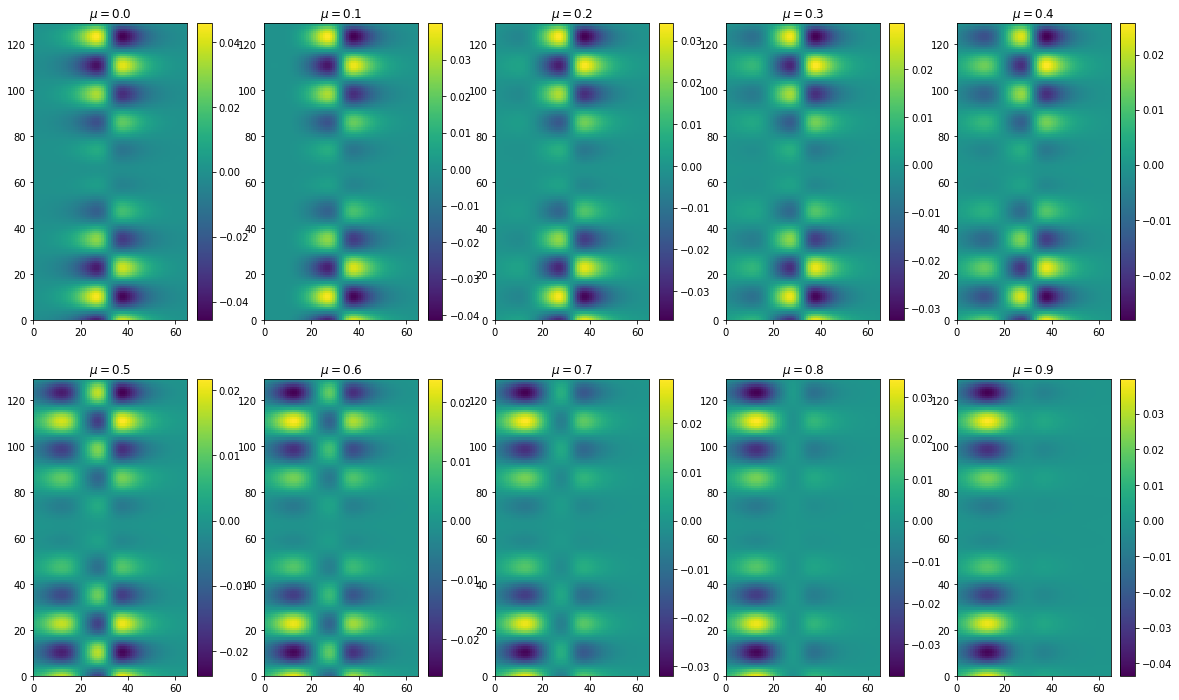

In [20]:
reconstructed = stPOD.expand(coeffs)

plt.figure(figsize=(20,12))
for i in range(reconstructed.shape[2]):
    plt.subplot(2, 5, i+1)
    plt.pcolor(reconstructed[:,:,i].real)
    plt.colorbar()
    plt.title('$\mu = {}$'.format(mus[i]))
plt.show()

## Error

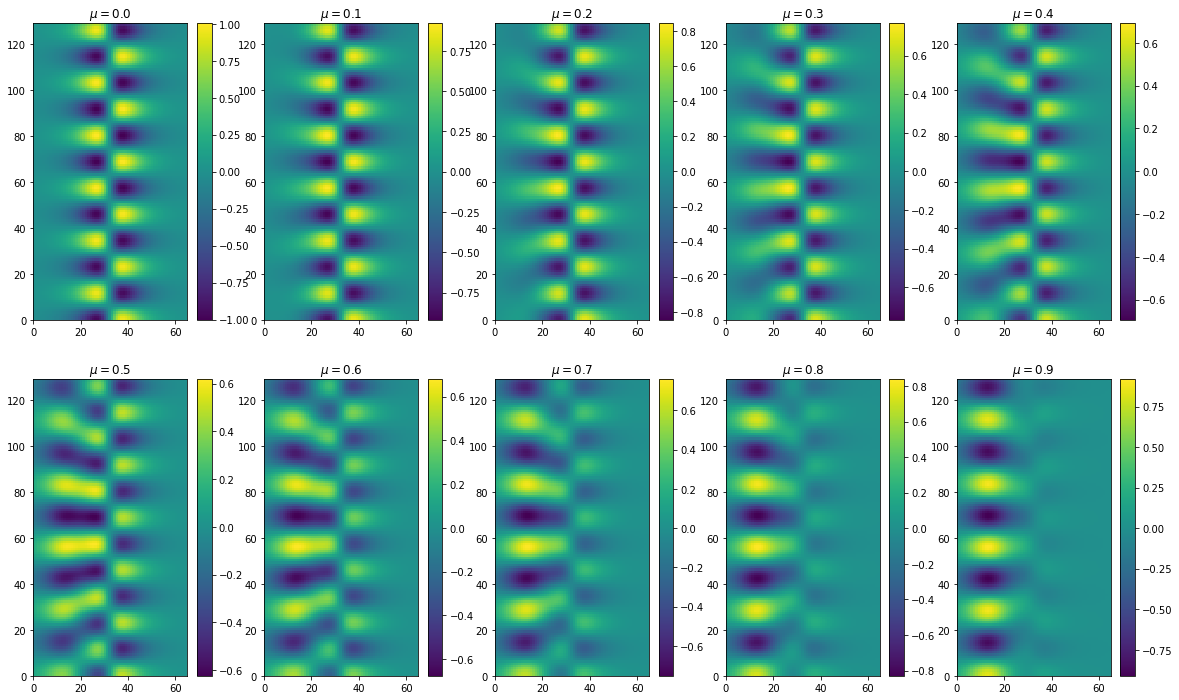

In [21]:
plt.figure(figsize=(20,12))
for i in range(reconstructed.shape[2]):
    plt.subplot(2, 5, i+1)
    plt.pcolor((Y[i].T - reconstructed[:,:,i]).real)
    plt.colorbar()
    plt.title('$\mu = {}$'.format(mus[i]))
plt.show()